<a href="https://colab.research.google.com/github/Aniket7773/Minimization-Of-Energy-Consumption-in-BlockChain-Technology/blob/main/Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import hashlib
import time

class Block:
    def __init__(self, index, previous_hash, data, difficulty):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.previous_hash = previous_hash
        self.difficulty = difficulty
        self.nonce, self.hash = self.proof_of_work()

    def proof_of_work(self):
        nonce = 0
        while True:
            hash_result = hashlib.sha256(f"{self.index}{self.previous_hash}{self.timestamp}{self.data}{nonce}".encode()).hexdigest()
            if hash_result[:self.difficulty] == '0' * self.difficulty:
                return nonce, hash_result
            nonce += 1

class Blockchain:
    def __init__(self, difficulty):
        self.difficulty = difficulty
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, "0", "Genesis Block", self.difficulty)

    def add_block(self, data):
        previous_hash = self.chain[-1].hash
        new_block = Block(len(self.chain), previous_hash, data, self.difficulty)
        self.chain.append(new_block)

# Example: Run blockchain with high PoW difficulty to see energy impact
difficulty = 4  # Adjust to simulate different energy consumption levels
blockchain = Blockchain(difficulty)
blockchain.add_block("Block 1")
blockchain.add_block("Block 2")

for block in blockchain.chain:
    print(f"Block #{block.index} | Nonce: {block.nonce} | Hash: {block.hash}")


Block #0 | Nonce: 24034 | Hash: 000045af2ffd8c58a9afb52da3bfd5e207e23b53c4db1a58c684ee330a922ced
Block #1 | Nonce: 45265 | Hash: 0000a24a0fdb5b9b399ff74781a7f03cf0984fc74998042dc5a43bfabd4c6be6
Block #2 | Nonce: 29315 | Hash: 00005dee83c3da34da0fb3d96638f713710a8dc8fe6291af4891bff43c66b72b


In [2]:
import time

def measure_mining_time(difficulty, data="Test Block"):
    start_time = time.time()
    blockchain = Blockchain(difficulty)
    blockchain.add_block(data)
    mining_time = time.time() - start_time
    return mining_time

baseline_difficulty = 4
baseline_energy_usage = measure_mining_time(baseline_difficulty)
print(f"Baseline Energy Usage (Difficulty {baseline_difficulty}): {baseline_energy_usage:.2f} seconds")


Baseline Energy Usage (Difficulty 4): 0.75 seconds


In [3]:
import random

class PoSBlockchain(Blockchain):
    def select_validator(self, stakers):
        total_stake = sum(staker['stake'] for staker in stakers)
        pick = random.uniform(0, total_stake)
        current = 0
        for staker in stakers:
            current += staker['stake']
            if current > pick:
                return staker

    def add_block_pos(self, data, stakers):
        validator = self.select_validator(stakers)
        new_block = Block(len(self.chain), self.chain[-1].hash, data, difficulty=1)  # Difficulty is low in PoS
        print(f"Validator: {validator['name']} added the block.")
        self.chain.append(new_block)

# Example: Run PoS blockchain
stakers = [{'name': 'Alice', 'stake': 50}, {'name': 'Bob', 'stake': 30}, {'name': 'Charlie', 'stake': 20}]
pos_blockchain = PoSBlockchain(difficulty=1)  # Low difficulty as PoS doesn't require intense mining
pos_blockchain.add_block_pos("Block 1", stakers)
pos_blockchain.add_block_pos("Block 2", stakers)


Validator: Bob added the block.
Validator: Bob added the block.


In [4]:
def measure_pos_time(stakers, data="Test Block"):
    start_time = time.time()
    pos_blockchain = PoSBlockchain(difficulty=1)
    pos_blockchain.add_block_pos(data, stakers)
    mining_time = time.time() - start_time
    return mining_time

pos_energy_usage = measure_pos_time(stakers)
print(f"PoS Energy Usage: {pos_energy_usage:.2f} seconds")
print(f"Energy Savings: {(baseline_energy_usage - pos_energy_usage) / baseline_energy_usage * 100:.2f}%")


Validator: Alice added the block.
PoS Energy Usage: 0.00 seconds
Energy Savings: 99.73%


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Placeholder for energy consumption data
energy_data_pow = []
energy_data_pos = []

# Define parameters
pow_difficulties = [2, 3, 4, 5, 6]  # Varying difficulty levels for PoW
num_trials = 5  # Number of trials per difficulty to get average times

# Collect energy data for PoW
for difficulty in pow_difficulties:
    times = []
    for _ in range(num_trials):
        start_time = time.time()
        blockchain = Blockchain(difficulty)
        blockchain.add_block("Sample Data")
        end_time = time.time() - start_time
        times.append(end_time)
    avg_time_pow = np.mean(times)
    energy_data_pow.append(avg_time_pow)

# Define PoS with simplified, constant time due to low difficulty
stakers = [{'name': 'Alice', 'stake': 50}, {'name': 'Bob', 'stake': 30}, {'name': 'Charlie', 'stake': 20}]
pos_trials = []
for _ in range(num_trials):
    start_time = time.time()
    pos_blockchain = PoSBlockchain(difficulty=1)
    pos_blockchain.add_block_pos("Sample Data", stakers)
    end_time = time.time() - start_time
    pos_trials.append(end_time)
avg_time_pos = np.mean(pos_trials)
energy_data_pos = [avg_time_pos] * len(pow_difficulties)  # PoS remains constant for all PoW difficulties


Validator: Alice added the block.
Validator: Charlie added the block.
Validator: Charlie added the block.
Validator: Bob added the block.
Validator: Alice added the block.


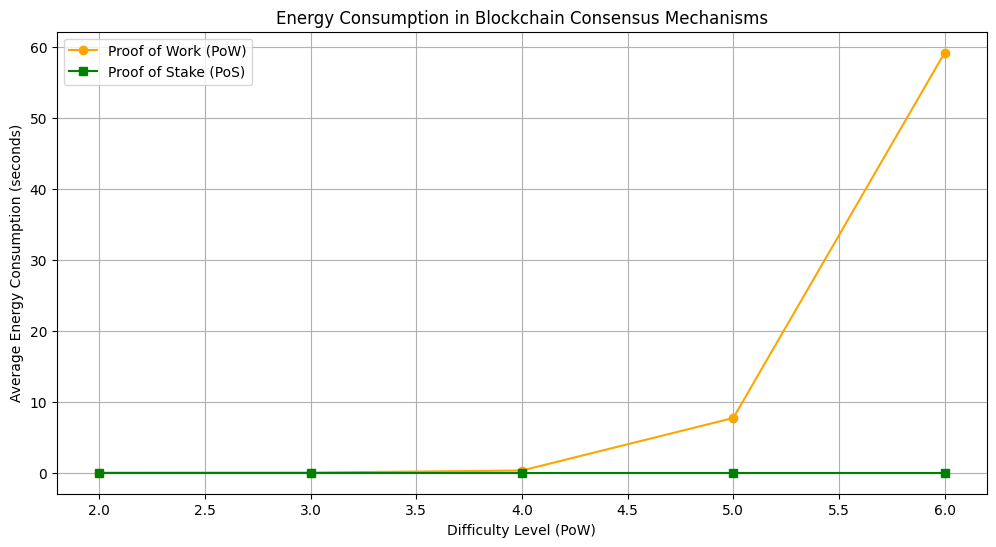

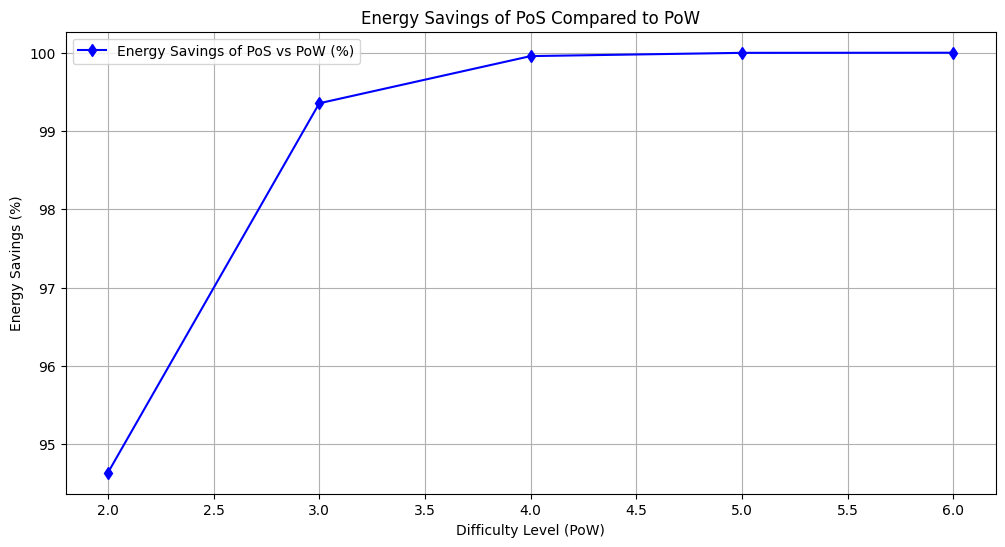

In [6]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Plot energy consumption for PoW
plt.plot(pow_difficulties, energy_data_pow, label='Proof of Work (PoW)', marker='o', color='orange')

# Plot energy consumption for PoS
plt.plot(pow_difficulties, energy_data_pos, label='Proof of Stake (PoS)', marker='s', color='green')

# Add title and labels
plt.title("Energy Consumption in Blockchain Consensus Mechanisms")
plt.xlabel("Difficulty Level (PoW)")
plt.ylabel("Average Energy Consumption (seconds)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Plot energy savings of PoS vs PoW
savings = [(pow - pos) / pow * 100 for pow, pos in zip(energy_data_pow, energy_data_pos)]

plt.figure(figsize=(12, 6))
plt.plot(pow_difficulties, savings, label='Energy Savings of PoS vs PoW (%)', marker='d', color='blue')
plt.title("Energy Savings of PoS Compared to PoW")
plt.xlabel("Difficulty Level (PoW)")
plt.ylabel("Energy Savings (%)")
plt.legend()
plt.grid(True)
plt.show()
